In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [44]:
df = pd.read_csv("/content/weather_forecast_data.csv")
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [45]:
df["Rain"] = df["Rain"].map({"rain":1, "no rain":0})


In [46]:
X = df[["Humidity", "Wind_Speed", "Cloud_Cover", "Pressure", "Rain"]]
y = df["Temperature"]

In [47]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [48]:


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

In [49]:
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y, y_pred)

In [50]:
print("ERRORS")
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R2: ", R2)

ERRORS
MAE:  5.8304602540884645
MSE:  47.16876582729304
RMSE:  6.8679520839398
R2:  0.12102541240169085


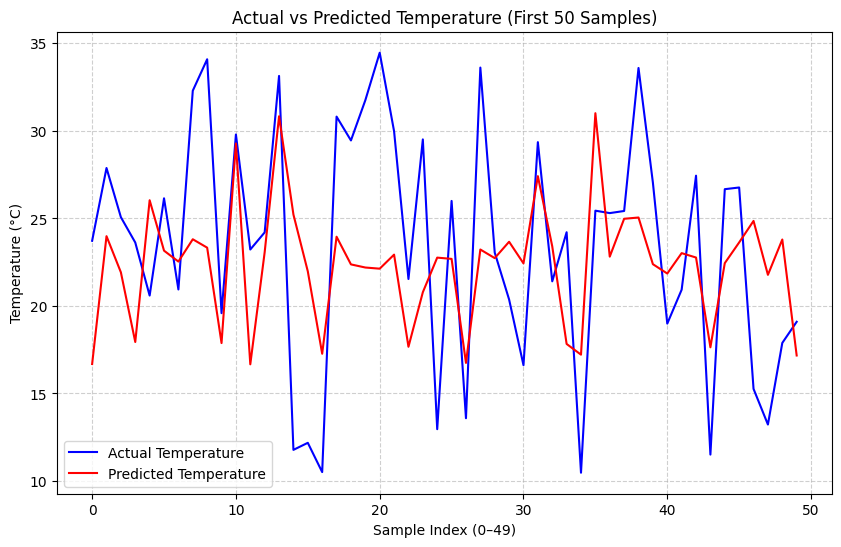

In [62]:
plt.figure(figsize=(10,6))

# Plot only first 50 actual and predicted values
plt.plot(y[:50].values, label="Actual Temperature", color='blue')
plt.plot(y_pred[:50], label="Predicted Temperature", color='red')

plt.title("Actual vs Predicted Temperature (First 50 Samples)")
plt.xlabel("Sample Index (0–49)")
plt.ylabel("Temperature (°C)")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
